In [1]:
!pip install tensorflow


Import Libraries

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


Create Image Data Generators


In [6]:
# Set parameters
image_size = (150, 150)
batch_size = 32

# Create ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Use 20% of the training data for validation
)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive (48)/Animals',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Set as training data
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive (48)/Animals',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)


Found 2416 images belonging to 3 classes.
Found 604 images belonging to 3 classes.


Build the CNN Model

In [7]:
model = models.Sequential()

# Add Convolutional Layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output
model.add(layers.Flatten())
# Fully connected Layer
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))  # 3 classes: cats, dogs, snakes

# Print model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,454,147 (13.18 MB)

 Trainable params: 3,454,147 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

 Compile the Model

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Training the Model

In [10]:
# Set the number of epochs
epochs = 10

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 688s 9s/step - accuracy: 0.4024 - loss: 1.0697 - val_accuracy: 0.3299 - val_loss: 1.0984
Epoch 2/10
 1/75 ━━━━━━━━━━━━━━━━━━━━ 2:15 2s/step - accuracy: 0.4375 - loss: 1.0987

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.4375 - loss: 1.0987 - val_accuracy: 0.3929 - val_loss: 1.0971
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.3783 - loss: 1.0906 - val_accuracy: 0.5069 - val_loss: 0.9764
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4688 - loss: 1.0121 - val_accuracy: 0.3929 - val_loss: 1.0055
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.4945 - loss: 0.9712 - val_accuracy: 0.5243 - val_loss: 0.9171
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5312 - loss: 0.9166 - val_accuracy: 0.4286 - val_loss: 0.9762
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.5618 - loss: 0.8655 - val_accuracy: 0.6215 - val_loss: 0.7814
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6250 - loss: 0.7114 - val_accuracy: 0.5714 - val_loss: 0.9378
Epoch 9/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.5996 - loss: 0.8126 - val_accuracy: 0.5365 - val_loss: 0.88

Evaluation of  the Model

In [11]:
# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {val_accuracy:.2f}')


19/19 ━━━━━━━━━━━━━━━━━━━━ 17s 826ms/step - accuracy: 0.5616 - loss: 0.7855
Validation accuracy: 0.57


 Training and Validation History

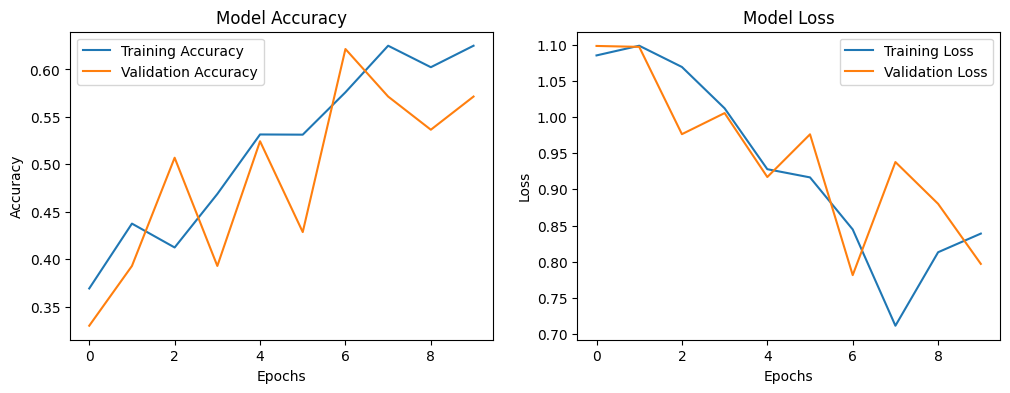

In [12]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
